In [1]:
!pip install bnltk
!pip install -U bnlp_toolkit
!pip install bltk
!pip install -U bnlp_toolkit 

     |████████████████████████████████| 1.2MB 7.2MB/s 
     |████████████████████████████████| 23.9MB 1.5MB/s 
     |████████████████████████████████| 747kB 37.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 17.4MB 215kB/s 
     |████████████████████████████████| 1.5MB 37.6MB/s 
  Created wheel for bltk: filename=bltk-1.2-cp37-none-any.whl size=17432538 sha256=253aae5b8faff21b5b740c02b5a46cdb5d2e07c109b0370e54582458421a63f1
  Stored in directory: /root/.cache/pip/wheels/8d/a2/28/31c169557c41c3c6c2227874781112102bd01578931f35803f
Successfully built bltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Requirement already up-to-date: bnlp_toolkit in /usr/local/lib/python3.7/dist-packages (3.1.1)


# **Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Bangla Dataset.xlsx')
data = data.loc[:, ~data.columns.str.contains("^Unnamed")]
data.head(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Bangla_Reviews,Class
0,প্রোডাক্টটি ভালো আমি এটা দিয়ে গেম খেলেছি টাচ ...,1
1,মোটামুটি ভালো,4
2,আগেও একটা নিয়েছিলাম,2
3,এটা অরিজিনাল ই পেয়েছি....কিন্তু এটা প্রাইস আরও...,3
4,আমি তোমাকে পেয়ে খুব খুশি হইছি। প্রোডাক্ট টি আ...,1
5,যে রকম চেয়েছি তেমন পেয়েছি।,1
6,৫ম বারের মতো অর্ডারটি সফলভাবে পেয়েছি। সেলার রে...,1
7,খুব ভালো ছিল।সবাই নিতে পারেন।,1
8,যেমন দেখানো হইছে তেমই দিছে,1
9,"দাম অনুযায়ী খুবই ভালো,,",1


# **resampling**


In [ ]:
"""catagori_map={0:0,1:1,5:2, 9:3, 8:4}
data['Class']=data['Class'].map(catagori_map)
data.to_excel("/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Bangla Dataset.xlsx",index = False)"""

'catagori_map={0:0,1:1,5:2, 9:3, 8:4}\ndata[\'Class\']=data[\'Class\'].map(catagori_map)\ndata.to_excel("/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Bangla Dataset.xlsx",index = False)'

# **Data Visualization**

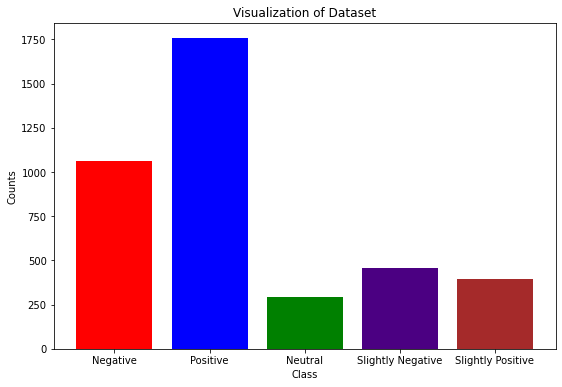

1    1757
0    1063
3     458
4     395
2     291
Name: Class, dtype: int64

In [3]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
x = x = ['Negative', 'Positive', 'Neutral', 'Slightly Negative', 'Slightly Positive']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(data[data['Class']== 0]), len(data[data['Class']== 1]), len(data[data['Class']== 2]),len(data[data['Class']== 3]),
     len(data[data['Class']== 4])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()
data["Class"].value_counts()

# **Pre-processing**

In [4]:
import re
from bltk.langtools import Tokenizer
tokenizer = Tokenizer()
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()

#for stopwords
from bltk.langtools import stopwords
from bltk.langtools import remove_stopwords

stop_words = set(stopwords.sw3)

#add new stopword that are not in stopword list
new_stopwords = {'এমনকি', 'একটা'}
new_stopwords_list = stop_words.union(new_stopwords)

#remove words that are in stopwords list
not_stopwords = {"না", "নেই", "নয়"} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])

#Puntuations
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)

vowels_signs = set(vowel_signs)
vowel = set(vowels)
constants = set(consonants)
punctuation = set(punctuations)
#################################
def stemming(text):
  txt = " ".join([bn_stemmer.stem(w) for w in text.split()])
  
  return txt

def remove_stopword(text):

  txt = " ".join(w for w in tokenizer.word_tokenizer(text) if w not in final_stop_words)

  return txt

def remove_punc(text):
  txt = re.sub("[০-৯a-zA-Z\.\,\!\?\:\;\-\=\_\'\"।|*/\\॥+->@#$%^&()÷<×৷৳]", " ", str(text))
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in punctuation)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in vowels_signs)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in vowel)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in constants)
  
  return txt

def remove_emoji(text):
  regrex_pattern = re.compile(pattern = "["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                            "]+", flags = re.UNICODE)
  
  txt = " ".join([regrex_pattern.sub(r' ',w) for w in text.split()])

  return txt

def preprocessing(text):
  text = remove_punc(text)
  text = remove_emoji(text)
  text = " ".join(text.split())  
  text = remove_stopword(text)
  text = stemming(text)

  return text

data['Reviews'] = data['Bangla_Reviews'].apply(preprocessing)
data["Reviews"].head(50)

0     প্রোডাক্ট ভালো গেম খেলে টাচ কোয়ালি ভাল ধন্যবা...
1                                           মোটামু ভালো
2                                         আগে নিয়েছিলাম
3                     অরিজিনাল পেয়ে প্রাইস কম রাখ দারাজ
4                       তোমা খুশি হই প্রোডাক্ট ভালো লেগ
5                                             চেয়ে পেয়ে
6                 বার অর্ডার সফলভাব পেয়ে সেল রেকমেন্ডেড
7                                              ভালো সবা
8                                      দেখানো হই তেম দি
9                                              দাম ভালো
10                                            সবা না বল
11                                                     
12    দিস মিয়া এড দেখাইলো কোন দিস কোন আমাগো এলাকা টা...
13    প্রোডাক্ট ভালো ছিলো প্যাকেজিং ভালো ছিলো ডেলিভা...
14    একদম নিম্ন মান প্রডাক্ট দিন শুতা খুল জানল ওয়া...
15    অর্ড করে জোড়া প্যাকেট ভিতর দি জোড়া ব্যস্ততা চে...
16                         মোটামু গেম কন্ট্রোল হারা ফেল
17                        ভালো পড় ধন্যবাদ বিক্র

# **Test**

In [ ]:
"""from bltk.langtools import stopwords

text = "মোটামুটি তেমন একটা ভালো না নয় কিছুই নেই"

stop_words = stop_words.union(stopwords.sw1)

#add new stopword that are not in stopword list
new_stopwords = {'এমনকি', 'একটা'}
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)

#remove words that are in stopwords list
not_stopwords = {"না", "নেই", "নয়"} 
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])
  
txt = " ".join(w for w in tokenizer.word_tokenizer(text) if w not in final_stop_words)

print(txt)"""
"""from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)

vowels_signs = set(vowel_signs)
vowel = set(vowels)
constants = set(consonants)
digit = set(digits)
operator = str(operators)
punctuation = str(punctuations)
others = set(others)

text = "মোটামুটি, তেমন ই একটা ভালো না...। নয়; কিছুই নেই?  অ\u200cনেক' অ অান্তরিক! 'ৈ ২৳টা নিয়েছিলাম ক+অ বন্ধ  ্‌ভালো " 
print(tokenizer.word_tokenizer(text))
def remove_punc(text):
  txt = re.sub("[০-৯a-zA-Z৳#$.]", "", str(text))
  txt = re.sub(operator, " ", str(txt))
  txt = re.sub(punctuation, "", str(txt))
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in punctuation)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in vowels_signs)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in vowel)
  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in constants)
  
  return txt
tx = remove_punc(text)
print(tx)"""

'from bltk.langtools.banglachars import (vowels,\n                                        vowel_signs,\n                                        consonants,\n                                        digits,\n                                        operators,\n                                        punctuations,\n                                        others)\n\nvowels_signs = set(vowel_signs)\nvowel = set(vowels)\nconstants = set(consonants)\ndigit = set(digits)\noperator = str(operators)\npunctuation = str(punctuations)\nothers = set(others)\n\ntext = "মোটামুটি, তেমন ই একটা ভালো না...। নয়; কিছুই নেই?  অ\u200cনেক\' অ অান্তরিক! \'ৈ ২৳টা নিয়েছিলাম ক+অ বন্ধ  ্\u200cভালো " \nprint(tokenizer.word_tokenizer(text))\ndef remove_punc(text):\n  txt = re.sub("[০-৯a-zA-Z৳#$.]", "", str(text))\n  txt = re.sub(operator, " ", str(txt))\n  txt = re.sub(punctuation, "", str(txt))\n  txt = " ".join(w for w in tokenizer.word_tokenizer(txt) if w not in punctuation)\n  txt = " ".join(w for w in tokenizer.w

# **Over Sampling**

In [5]:
#Remove unncessary columns
dataf = data.drop('Bangla_Reviews', axis = 1)
dataf

,Class,Reviews
0,1,প্রোডাক্ট ভালো গেম খেলে টাচ কোয়ালি ভাল ধন্যবা...
1,4,মোটামু ভালো
2,2,আগে নিয়েছিলাম
3,3,অরিজিনাল পেয়ে প্রাইস কম রাখ দারাজ
4,1,তোমা খুশি হই প্রোডাক্ট ভালো লেগ
...,...,...
3959,2,মোবাইল ইনপুট চার্জ পিন সমাস্যা স্য
3960,2,ডেলিভারি পাওয় কারণ ভাঙা রিটার্ন প্লিজ
3961,2,দয়া আরেক অড করুন সুন্দর পেকেট দেবো ইনশাআল্লাহ
3962,2,যথারীতি না পালা রিটার্ন প্লিজ এক্সচঞ্জ দিব


In [6]:
from imblearn import over_sampling
from collections import Counter

X = dataf.drop('Class', axis=1)
Y = dataf['Class']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape) 

[(0, 1757), (1, 1757), (2, 1757), (3, 1757), (4, 1757)] (8785,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
resampled_data = pd.DataFrame(X_resampled, columns=['Reviews'])
resampled_data['Class'] = y_resampled
resampled_data

,Reviews,Class
0,প্রোডাক্ট ভালো গেম খেলে টাচ কোয়ালি ভাল ধন্যবা...,1
1,মোটামু ভালো,4
2,আগে নিয়েছিলাম,2
3,অরিজিনাল পেয়ে প্রাইস কম রাখ দারাজ,3
4,তোমা খুশি হই প্রোডাক্ট ভালো লেগ,1
...,...,...
8780,আরেকটু তারাতাড়ি ডেলিভারি আরো ভালো হ পন্য একসা...,4
8781,প্রডাক্ট ভালো সাইজ ছোট ডেস্ক্রিপশন সাথ সাইজ মি...,4
8782,দোকান ওয়াইফা দি কিন্তুু বাস ওয়াইফা মোবাইল ডা দ...,4
8783,টাক জিনিষ হওয় কথা তেমন খারাপ না ভালো,4


# **Data Visualization**

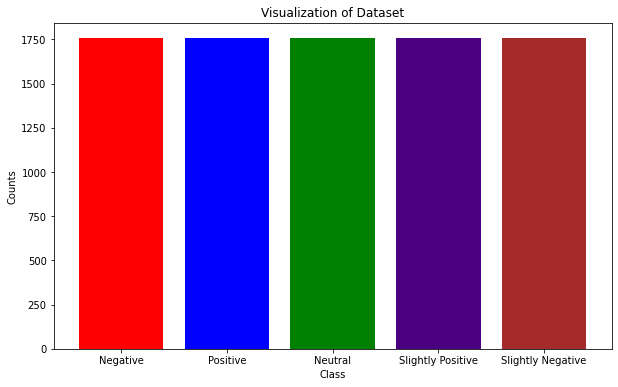

In [8]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
x = ['Negative', 'Positive', 'Neutral', 'Slightly Positive', 'Slightly Negative']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(resampled_data[resampled_data['Class']== 0]), len(resampled_data[resampled_data['Class']== 1]), 
     len(resampled_data[resampled_data['Class']== 2]),len(resampled_data[resampled_data['Class']== 3]),
     len(resampled_data[resampled_data['Class']== 4])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()

# **Feature Extraction**

In [9]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split())

tfidf_vect = tfidf.fit_transform(resampled_data['Reviews'])

df = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())
#tfidf.get_feature_names()
df

,অ,অংশ,অক্ষত,অক্ষর,অখুশি,অগ্রহণযোগ্য,অগ্রিম,অঙ্কিত,অচল,অটো,অড,অডার,অডি,অত,অতন্ত্য,অতি,অতিক্রম,অতিবাহিত,অতিরিক্ত,অতিষ্ট,অতী,অতীত,অতুলনী,অত্যন্ত,অত্যান্ত,অথেনটিক,অথেন্টিক,অধিক,অন,অনক,অনগয়িং,অনটাইম,অনন্য,অনর্থক,অনলাইন,অনান্য,অনায়াস,অনিচ্ছাকৃত,অনিষ্পন্ন,অনু,...,হয়না,হয়নি,হয়রানি,হয়রানির,হয়রানী,হয়া,হয়ে,হয়েগ,হয়েযা,হ‌,্কিন্তু,্ঠিক,্না,্নি,্নে,্পারফিউম,্পেয়ে,্ব্যাটারি,্মোটামো,্য,্যবাদ,্যাগ্র,্যাচ,্যাডিয়েন্ট,্যান,্যান্ড,্যান্স,্যাপ,্যাপিং,্যাবল,্যাবহ,্যাম,্যামগুলা,্লেইট,্সব,য়্যু,‌নেওয়,‌মোটামু‌,‌মোটাম‌,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cVect = CountVectorizer(tokenizer=lambda x: x.split())
count_vect = cVect.fit_transform(resampled_data['Reviews'])

df = pd.DataFrame(count_vect.toarray(), columns=cVect.get_feature_names())
df

,অ,অংশ,অক্ষত,অক্ষর,অখুশি,অগ্রহণযোগ্য,অগ্রিম,অঙ্কিত,অচল,অটো,অড,অডার,অডি,অত,অতন্ত্য,অতি,অতিক্রম,অতিবাহিত,অতিরিক্ত,অতিষ্ট,অতী,অতীত,অতুলনী,অত্যন্ত,অত্যান্ত,অথেনটিক,অথেন্টিক,অধিক,অন,অনক,অনগয়িং,অনটাইম,অনন্য,অনর্থক,অনলাইন,অনান্য,অনায়াস,অনিচ্ছাকৃত,অনিষ্পন্ন,অনু,...,হয়না,হয়নি,হয়রানি,হয়রানির,হয়রানী,হয়া,হয়ে,হয়েগ,হয়েযা,হ‌,্কিন্তু,্ঠিক,্না,্নি,্নে,্পারফিউম,্পেয়ে,্ব্যাটারি,্মোটামো,্য,্যবাদ,্যাগ্র,্যাচ,্যাডিয়েন্ট,্যান,্যান্ড,্যান্স,্যাপ,্যাপিং,্যাবল,্যাবহ,্যাম,্যামগুলা,্লেইট,্সব,য়্যু,‌নেওয়,‌মোটামু‌,‌মোটাম‌,…
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Train test split**

In [11]:
#split data
label = resampled_data['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, label, test_size = 0.2, random_state = 1)

Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
skfold=StratifiedKFold(n_splits=10)

In [12]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

kfold_validation=KFold(n_splits=10, shuffle=True)

# **Algorithm**

# **MNB**

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(x_train,y_train)
y_pred_mnb = mnb_model.predict(x_test)
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       333
           1       0.86      0.66      0.74       369
           2       0.91      0.93      0.92       365
           3       0.77      0.85      0.81       337
           4       0.73      0.89      0.80       353

    accuracy                           0.81      1757
   macro avg       0.82      0.81      0.81      1757
weighted avg       0.82      0.81      0.81      1757



Confusion Matrix

Confusion matrix, without normalization for Multinomial NB
[[244  20  14  27  28]
 [ 26 242  15  32  54]
 [  7   6 339   8   5]
 [ 12   7   2 288  28]
 [ 10   6   2  21 314]]


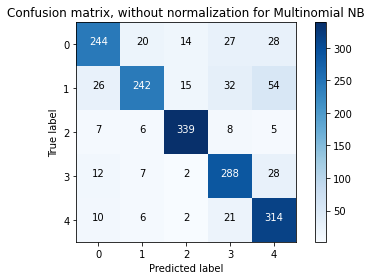

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Multinomial NB")
    else:
        print('Confusion matrix, without normalization for Multinomial NB')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_mnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Multinomial NB')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/MNB COnfusion.png')

ROC_AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


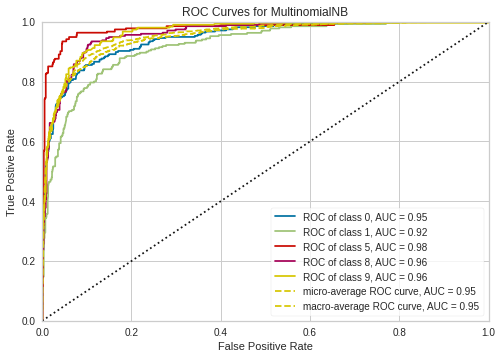

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_mnd_prob = mnb_model.predict_proba(x_test)
"""mnb = roc_auc_score(y_test, y_pred_mnd_prob, multi_class="ovo")
print("Roc_AUC Score: ", mnb, "\n")"""

# Instantiate the visualizer with the classification model
roc_auc(mnb_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])


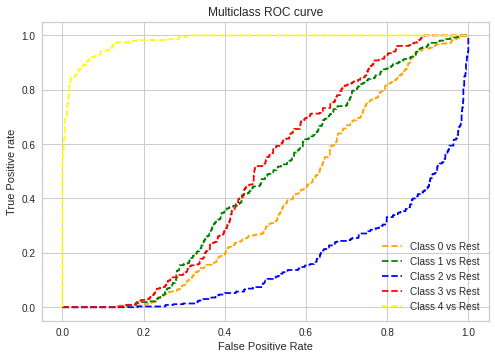

In [ ]:
"""from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split"""
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#pred_prob = clf.predict_proba(X_test)
y_pred_mnd_prob = mnb_model.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_mnd_prob[:,4], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

Using cross validation

In [18]:
results=cross_val_score(mnb_model,tfidf_vect,label,cv=kfold_validation, scoring = 'accuracy')
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.84 0.8  0.82 0.81 0.84 0.83 0.83 0.8  0.82 0.82] 

Accuracy: 0.82 (0.01)


# **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lgc_model = LogisticRegression(multi_class="multinomial")
#ovr = OneVsRestClassifier(lgc_model)
lgc_model = lgc_model.fit(x_train,y_train)
y_pred_lgc = lgc_model.predict(x_test)
print(classification_report(y_test,y_pred_lgc))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       333
           1       0.90      0.79      0.84       369
           2       0.93      0.97      0.95       365
           3       0.86      0.88      0.87       337
           4       0.90      0.91      0.91       353

    accuracy                           0.88      1757
   macro avg       0.88      0.88      0.88      1757
weighted avg       0.88      0.88      0.88      1757



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix

Confusion matrix, without normalization for Logistic Regression
[[284  19  11  11   8]
 [ 34 292  12  15  16]
 [  5   0 354   4   2]
 [ 20  11   3 295   8]
 [ 10   2   1  19 321]]


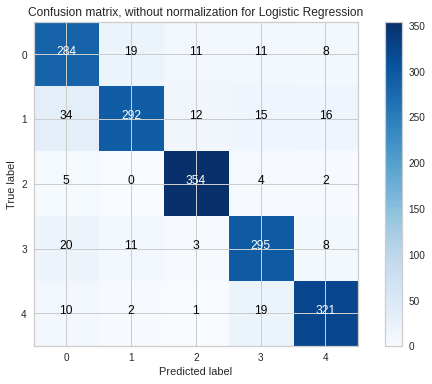

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Logistic Regression")
    else:
        print('Confusion matrix, without normalization for Logistic Regression')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_lgc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Logistic Regression')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/LGC COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.9748183026069148 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


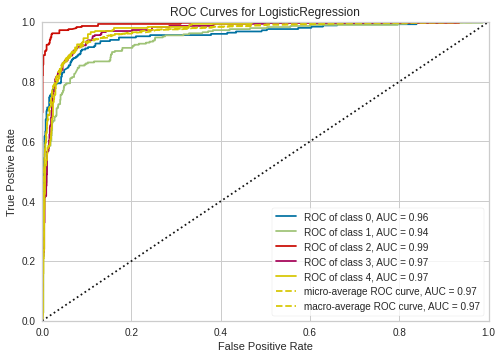

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_lgc_prob = lgc_model.predict_proba(x_test)
lgc = roc_auc_score(y_test, y_pred_lgc_prob, multi_class="ovo")
print("Roc_AUC Score: ", lgc, "\n")

# Instantiate the visualizer with the classification model
roc_auc(lgc_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [22]:
results=cross_val_score(lgc_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.86 0.88 0.9  0.88 0.88 0.88 0.88 0.87 0.87 0.87] 

Accuracy: 0.88 (0.01)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **SVM**

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svmModel = SVC(kernel = 'rbf', probability=True)
svmModel.fit(x_train,y_train)
y_predSVM = svmModel.predict(x_test)
#print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       333
           1       0.93      0.88      0.90       369
           2       0.98      1.00      0.99       365
           3       0.93      0.95      0.94       337
           4       0.97      0.97      0.97       353

    accuracy                           0.94      1757
   macro avg       0.94      0.94      0.94      1757
weighted avg       0.94      0.94      0.94      1757



Confusion Matrix

Confusion matrix, without normalization for SVM
[[304  18   2   7   2]
 [ 25 325   4   7   8]
 [  0   0 365   0   0]
 [  8   6   3 319   1]
 [  1   2   0   9 341]]


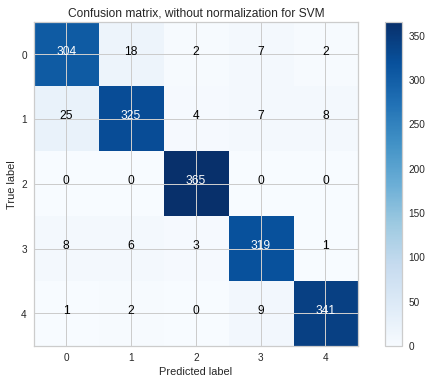

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for SVM')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_predSVM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for SVM')

ROC_AUC

Roc_AUC Score:  0.9929306783340891 



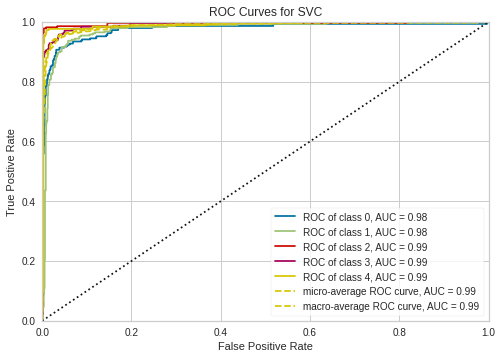

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_svm_prob = svmModel.predict_proba(x_test)
svm = roc_auc_score(y_test, y_pred_svm_prob, multi_class="ovo")
print("Roc_AUC Score: ", svm, "\n")

# Instantiate the visualizer with the classification model
roc_auc(svmModel, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [26]:
results=cross_val_score(svmModel,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.95 0.95 0.95 0.94 0.94 0.95 0.95 0.93 0.95 0.95] 

Accuracy: 0.95 (0.01)


# **Passive Algorithm**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
print(classification_report(y_test,pred))

Cross Validation

In [ ]:
results=cross_val_score(linear_clf,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

# **Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       333
           1       0.92      0.81      0.86       369
           2       0.92      1.00      0.96       365
           3       0.93      0.95      0.94       337
           4       0.97      0.98      0.97       353

    accuracy                           0.93      1757
   macro avg       0.93      0.93      0.92      1757
weighted avg       0.93      0.93      0.92      1757



Confusion Matrix

Confusion matrix, without normalization for Random Forest
[[299  16  10   7   1]
 [ 28 296  20  14  11]
 [  0   0 365   0   0]
 [  6   4   3 324   0]
 [  1   2   0   7 343]]


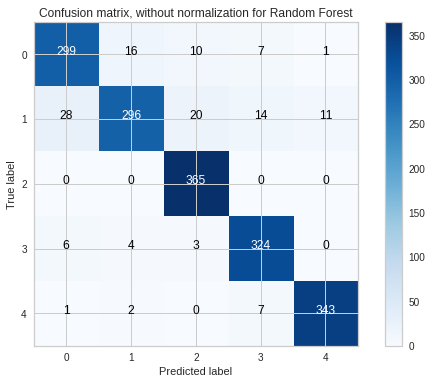

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Random Forest")
    else:
        print('Confusion matrix, without normalization for Random Forest')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Random Forest')

ROC_AUC

Roc_AUC Score:  0.9920815226895086 



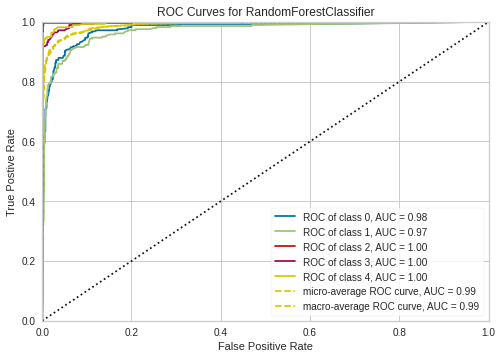

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_rf_prob = rf_model.predict_proba(x_test)
rf = roc_auc_score(y_test, y_pred_rf_prob, multi_class="ovo")
print("Roc_AUC Score: ", rf, "\n")

# Instantiate the visualizer with the classification model
roc_auc(rf_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validaion

In [30]:
results=cross_val_score(rf_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.93 0.95 0.95 0.94 0.93 0.94 0.94 0.92 0.95 0.92] 

Accuracy: 0.94 (0.01)


# **KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.93      0.78       333
           1       0.91      0.63      0.74       369
           2       0.99      0.99      0.99       365
           3       0.98      0.94      0.96       337
           4       0.97      0.95      0.96       353

    accuracy                           0.89      1757
   macro avg       0.90      0.89      0.89      1757
weighted avg       0.90      0.89      0.89      1757



Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for KNN")
    else:
        print('Confusion matrix, without normalization for KNN')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for KNN')

ROC_AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_knn_prob = knn_model.predict_proba(x_test)
knn = roc_auc_score(y_test, y_pred_knn_prob, multi_class="ovo")
print("Roc_AUC Score: ", knn, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [35]:
results=cross_val_score(knn_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.86 0.87 0.86 0.86 0.91 0.88 0.87 0.85 0.87 0.87] 

Accuracy: 0.87 (0.01)


# **Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dst_model = DecisionTreeClassifier()
dst_model.fit(x_train, y_train)
y_pred_dst = dst_model.predict(x_test)
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       333
           1       0.93      0.67      0.78       369
           2       0.87      1.00      0.93       365
           3       0.86      0.96      0.91       337
           4       0.92      0.98      0.95       353

    accuracy                           0.89      1757
   macro avg       0.89      0.89      0.89      1757
weighted avg       0.89      0.89      0.88      1757



Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Decision Tree")
    else:
        print('Confusion matrix, without normalization for Decision Tree')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_dst)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Decision Tree')

ROC_AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_dst_prob = dst_model.predict_proba(x_test)
dst = roc_auc_score(y_test, y_pred_dst_prob, multi_class="ovo")
print("Roc_AUC Score: ", dst, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [37]:
results=cross_val_score(dst_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.9  0.91 0.89 0.91 0.89 0.92 0.89 0.92 0.9  0.91] 

Accuracy: 0.90 (0.01)


# **Predictive Model**

In [46]:
def preprocessing(text):
  text = remove_punc(text)
  text = remove_emoji(text)
  text = " ".join(text.split()) 
  text = remove_stopword(text)
  text = stemming(text)
  text = tfidf.transform([text])

  return text

text = "জিনিস খুব-ই ভালো। তবে দাম একটু বেশি মার্কেটের তুলনায়।"
print("Review: " ,text)
txt = preprocessing(text)
predict = rf_model.predict(txt)
if predict[0] == 1:
  print("Sentiment : Positive")
elif predict[0] == 0:
  print("Sentiment : Negative")
elif predict[0] == 4:
  print("Sentiment : Slightly Positive")
elif predict[0] == 3:
  print("Sentiment : Slightly Negative")
elif predict[0] == 2:
  print("Sentiment : Neutral")

Review:  জিনিস খুব-ই ভালো। তবে দাম একটু বেশি মার্কেটের তুলনায়।
Sentiment : Slightly Negative
